In [1]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import load_model
from keras.utils import CustomObjectScope
import tensorflow as tf

/Users/ketanagrawal/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

(720, 960, 3)


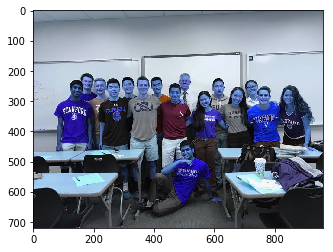

In [4]:
img = cv2.imread('/Users/ketanagrawal/Desktop/open-door/mvcfaces.jpg')
plt.imshow(img)
print img.shape
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [4]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
# for (x,y,w,h) in faces:
#     cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
#     roi_gray = gray[y:y+h, x:x+w]
#     roi_color = img[y:y+h, x:x+w]
#     eyes = eye_cascade.detectMultiScale(roi_gray)
#     for (ex,ey,ew,eh) in eyes:
#         cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
# cv2.imshow('img',img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [7]:
x, y, w, h = faces[0]
crop_img = img[y:y+h, x:x+w]


<type 'numpy.ndarray'>


In [ ]:
cv2.imshow('img',crop_img)
cv2.waitKey()

In [5]:
def detect_faces(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    face_boxes = face_cascade.detectMultiScale(gray, 1.3, 5)
    faces = [img[y:y+h, x:x+w] for (x, y, w, h) in face_boxes]
    return faces

def detect_largest_face(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    face_boxes = face_cascade.detectMultiScale(gray, 1.3, 5)
    face_areas = [w*h for x, y, w, h in face_boxes]
    return face_boxes[face_areas.index(max(face_areas))]

def detect_eyes(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    eye_boxes = eye_cascade.detectMultiScale(gray, 1.3, 5)
    eyes = [img[y:y+h, x:x+w] for (x, y, w, h) in eye_boxes]
    return eyes

In [6]:
#plt.imshow(img)
x,y,w,h = detect_largest_face(img)
face = img[y:y+h, x:x+w]
cv2.imshow('largest face', face)
    
# eyes = detect_eyes(img)
# print len(eyes)
# for i, eye in enumerate(eyes):
#     cv2.imshow('eye #%d' % i, eye)
#     print eye.shape
cv2.waitKey()
cv2.destroyAllWindows()